In [160]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException

import matplotlib.pyplot as plt
import numpy as np

In [161]:
# Path to chromedriver, install from below link depending on your version of Google Chrome
# https://chromedriver.chromium.org/downloads
PATH = "./chromedriver"
driver = webdriver.Chrome(PATH)

In [162]:
# Enter your TypeRacer username here
USERNAME = "zuhaibdam"
driver.get(f"https://data.typeracer.com/pit/race_history?user={USERNAME}&n=100")

In [163]:
all_data = []

In [164]:
while(1):
    cur_table = driver.find_elements_by_class_name("Scores__Table__Row")

    cur_data = []

    for val in cur_table:
        values = val.text.split('\n')
        cur_data.append(values)
        
    all_data.extend(cur_data)
    
    lastPage = driver.find_elements_by_xpath("//*[contains(text(), 'load older')]")
    if lastPage != []:
        lastPage[0].click()
    else:
        break

In [253]:
import pandas as pd
from datetime import datetime

pd.set_option('mode.chained_assignment', None)

# Convert List to a Pandas DataFrame
df = pd.DataFrame(all_data)

# Reverse the DF to make it chronological
df = df.loc[::-1].reset_index(drop=True)

# Add names to columns
df.columns = ["RaceNo", "WPM", "Accuracy", "Points", "Rank", "Date"]

# Change format of today to the current date
df.loc[df['Date'] == 'today', 'Date'] = datetime.now().strftime("%B %d, %Y")

df

,RaceNo,WPM,Accuracy,Points,Rank,Date
0,1,68 WPM,97.1%,55,3/5,"June 16, 2019"
1,2,80 WPM,98.1%,76,2/5,"June 16, 2019"
2,3,59 WPM,95.2%,36,4/5,"June 16, 2019"
3,4,63 WPM,97.0%,62,4/5,"June 16, 2019"
4,5,58 WPM,94.7%,39,4/5,"June 16, 2019"
...,...,...,...,...,...,...
15660,15661,121 WPM,97.3%,77,1/3,"November 04, 2022"
15661,15662,118 WPM,98.1%,175,1/5,"November 04, 2022"
15662,15663,122 WPM,98.4%,182,1/4,"November 04, 2022"
15663,15664,109 WPM,97.8%,65,1/5,"November 04, 2022"


In [254]:
# Drop all duplicate values
df = df.drop_duplicates()

In [255]:
# Convert WPM to an integer
# df['WPM'] = df['WPM'].apply(lambda x: x[:-4])
df.loc[:, 'WPM'] = df['WPM'].apply(lambda x: int(x[:-4]))

# Convert Accuracy to an integer
df.loc[:, 'Accuracy'] = df['Accuracy'].apply(lambda x: float(x[:-1]))

# Convert Date to DateTime
df['Date'] = pd.to_datetime(df['Date'])

df

,RaceNo,WPM,Accuracy,Points,Rank,Date
0,1,68,97.1,55,3/5,2019-06-16
1,2,80,98.1,76,2/5,2019-06-16
2,3,59,95.2,36,4/5,2019-06-16
3,4,63,97.0,62,4/5,2019-06-16
4,5,58,94.7,39,4/5,2019-06-16
...,...,...,...,...,...,...
15660,15661,121,97.3,77,1/3,2022-11-04
15661,15662,118,98.1,175,1/5,2022-11-04
15662,15663,122,98.4,182,1/4,2022-11-04
15663,15664,109,97.8,65,1/5,2022-11-04


In [256]:
# Split rank into two columns
df['Rank'] = df['Rank'].apply(lambda x:x.split('/'))
df['Position'] = df['Rank'].apply(lambda x: x[0])
df['Racers'] = df['Rank'].apply(lambda x: x[1])
df = df.drop(['Rank'], axis=1)
df.rename(columns = {'Position':'Rank'}, inplace = True)

# Convert multiple columns to NUMERIC
cols = ['RaceNo', 'Points', 'Rank', 'Racers']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [257]:
df.dtypes

RaceNo               int64
WPM                  int64
Accuracy           float64
Points               int64
Date        datetime64[ns]
Rank                 int64
Racers               int64
dtype: object

In [259]:
# Number of times the race was won
df.loc[df['Rank'] == 1]

,RaceNo,WPM,Accuracy,Points,Date,Rank,Racers
6,7,68,96.7,66,2019-06-16,1,4
14,15,72,97.3,101,2019-06-16,1,3
15,16,63,95.7,106,2019-06-17,1,4
16,17,74,96.3,85,2019-06-17,1,5
20,21,55,94.6,48,2019-06-17,1,5
...,...,...,...,...,...,...,...
15659,15660,134,99.5,85,2022-11-04,1,5
15660,15661,121,97.3,77,2022-11-04,1,3
15661,15662,118,98.1,175,2022-11-04,1,5
15662,15663,122,98.4,182,2022-11-04,1,4


In [291]:
# All races by descending order of WPM
df.sort_values(by=['WPM', 'Accuracy', 'Points'], ascending=False).head(20)

,RaceNo,WPM,Accuracy,Points,Date,Rank,Racers
15298,15299,140,99.5,91,2022-01-31,1,5
15654,15655,136,100.0,111,2022-11-04,2,3
15251,15252,135,100.0,88,2021-11-29,1,2
13106,13107,135,100.0,20,2021-08-03,3,5
10712,10713,135,99.4,79,2021-06-22,1,4
8282,8283,135,99.3,182,2020-09-29,1,4
11510,11511,134,100.0,87,2021-07-12,1,5
15659,15660,134,99.5,85,2022-11-04,1,5
13093,13094,132,100.0,64,2021-08-02,1,5
2878,2879,132,100.0,46,2020-04-01,1,5


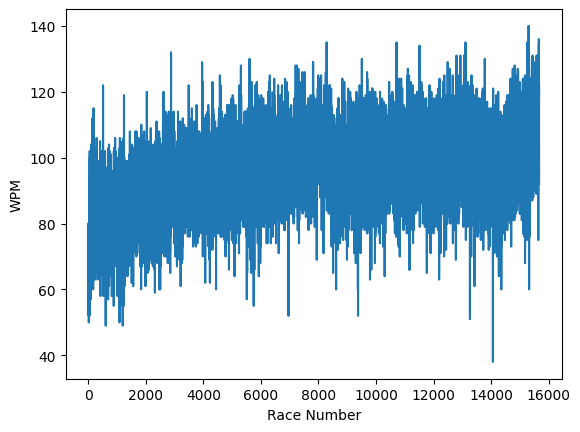

In [261]:
# Typing Speed over time

plt.xlabel("Race Number")
plt.ylabel("WPM")
plt.plot(df['RaceNo'], df['WPM'])

In [262]:
# Average typing speed of all time
df['WPM'].aggregate(['average']).average

95.40957548675391

2019: 1789 races
2020: 7493 races
2021: 5946 races
2022: 381 races


<BarContainer object of 4 artists>

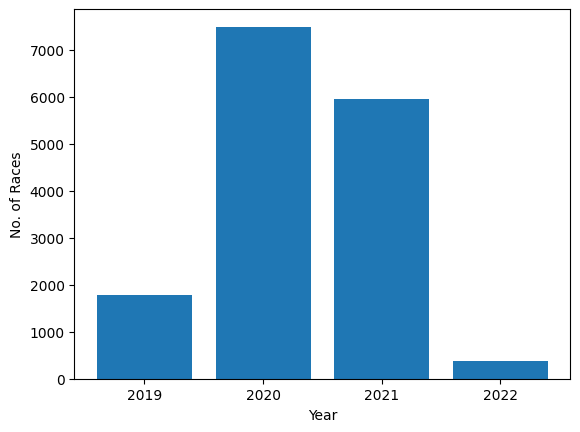

In [282]:
# Total number of races in all years the account has been active

start = df.iloc[0]['Date'].year
end = df.iloc[len(df)-1]['Date'].year

x_indexes = np.arange(start, end+1)

totalRaces = []
yearList = []

for year in range(start, end+1):
    yearDF = df.loc[(df['Date'] > f'{year}') & (df['Date'] < f'{year+1}')]
    races = len(yearDF)
    totalRaces.append(races)
    yearList.append(year)
    
    print(f"{year}: {races} races")
    
plt.xlabel("Year")
plt.ylabel("No. of Races")
    
plt.xticks(x_indexes, yearList, rotation ='horizontal')
plt.bar(np.arange(start, end+1), totalRaces)

2019: 83.01 WPM
2020: 94.35 WPM
2021: 99.64 WPM
2022: 109.6 WPM


<BarContainer object of 4 artists>

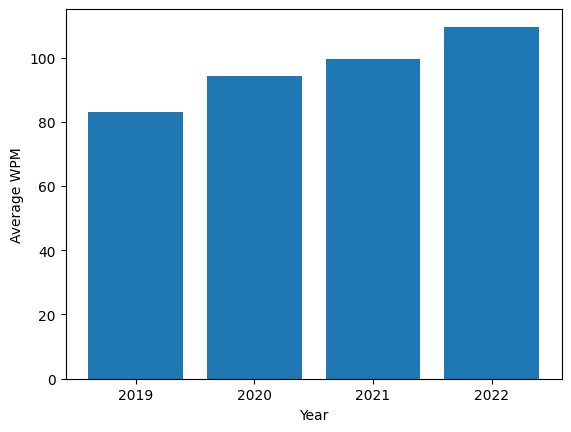

In [281]:
# AVERAGE typing speed for all years the account has been active

start = df.iloc[0]['Date'].year
end = df.iloc[len(df)-1]['Date'].year

x_indexes = np.arange(start, end+1)

avgList = []
yearList = []

for year in range(start, end+1):
    yearDF = df.loc[(df['Date'] > f'{year}') & (df['Date'] < f'{year+1}')]
    avgSpeed = (yearDF['WPM'].aggregate(['average']).average) if not (yearDF.empty) else 0.0
    avgList.append(avgSpeed)
    yearList.append(year)
    
    print(f"{year}: {float('{:.2f}'.format(avgSpeed))} WPM")
    
plt.xlabel("Year")
plt.ylabel("Average WPM")
    
plt.xticks(x_indexes, yearList, rotation ='horizontal')
plt.bar(np.arange(start, end+1), avgList)

2019 31.86137506987144
2020 37.28813559322034
2021 42.583249243188696
2022 44.881889763779526


<BarContainer object of 4 artists>

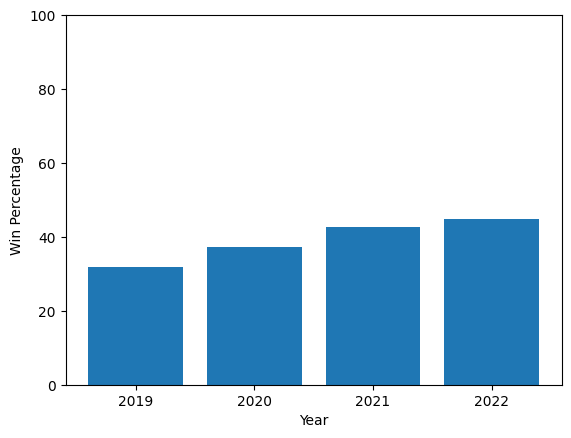

In [292]:
# Win Percentage for every year
start = df.iloc[0]['Date'].year
end = df.iloc[len(df)-1]['Date'].year

x_indexes = np.arange(start, end+1)

winList = []
yearList = []

for year in range(start, end+1):
    yearDF = df.loc[(df['Date'] > f'{year}') & (df['Date'] < f'{year+1}')]
    winPercentage = (len(yearDF.loc[yearDF['Rank'] == 1])) / (len(yearDF)) * 100
    winList.append(winPercentage)
    yearList.append(year)
    
    print(year, winPercentage)
#     print(f"{year}: {float('{:.2f}'.format(avgSpeed))} WPM")

# Set Y Axis limit
ax = plt.gca()
ax.set_ylim([0, 100])

plt.xlabel("Year")
plt.ylabel("Win Percentage")

plt.xticks(x_indexes, yearList, rotation ='horizontal')
plt.bar(np.arange(start, end+1), winList)

In [ ]:
# Save to CSV WITHOUT INDEX
df.to_csv(f"TypeRacerData_{USERNAME}.csv", index=False)